In [ ]:
!pip install scikit-plot
!pip install sklearn
!pip install scikit-learn
!pip install scikit-image
!pip install mlxtend

In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier



In [ ]:
import io
df2 = pd.read_csv('Datasets/Kaggle_data.csv')
print(df2.shape)
print(df2.describe())
print(df2.info())

(498, 7)
              Age      Gender  family_history   anonymity  work_interfere  \
count  498.000000  498.000000      498.000000  498.000000      498.000000   
mean    25.710843    0.232932        0.367470    1.626506        0.594378   
std      2.623359    0.423124        0.482601    0.589189        0.491506   
min     18.000000    0.000000        0.000000    0.000000        0.000000   
25%     24.000000    0.000000        0.000000    1.000000        0.000000   
50%     26.000000    0.000000        0.000000    2.000000        1.000000   
75%     28.000000    0.000000        1.000000    2.000000        1.000000   
max     29.000000    1.000000        1.000000    2.000000        1.000000   

        treatment     train_y  
count  498.000000  498.000000  
mean     0.463855    0.618474  
std      0.499193    0.486250  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000  
<class 'p

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
df2['Age'] = scaler.fit_transform(df2[['Age']])
df2.head()

,Age,Gender,family_history,anonymity,work_interfere,treatment,train_y
0,0.454545,0,0,2,0,0,0
1,1.000000,0,0,2,0,0,0
2,0.818182,0,0,2,0,0,0
3,1.000000,1,1,2,1,1,1
4,0.454545,0,0,2,1,1,1


In [ ]:
import io
df7 = pd.read_csv('Datasets/SG_data.csv')
print(df7.shape)
print(df7.describe())
print(df7.info())

(72, 18)
       Unnamed: 0        age       year     gender  financial_stable  \
count    72.00000  72.000000  72.000000  72.000000         72.000000   
mean     36.50000  22.125000   2.194444   0.402778          4.000000   
std      20.92845   1.403592   0.866251   0.493899          1.300054   
min       1.00000  19.000000   1.000000   0.000000          1.000000   
25%      18.75000  21.000000   2.000000   0.000000          3.000000   
50%      36.50000  22.000000   2.000000   0.000000          4.000000   
75%      54.25000  23.000000   2.000000   1.000000          5.000000   
max      72.00000  25.000000   5.000000   1.000000          6.000000   

           sleep   exercise      meals  loss_of_int  concentrate  \
count  72.000000  72.000000  72.000000    72.000000    72.000000   
mean    1.625000   2.041667   2.458333     1.680556     2.222222   
std     0.615241   0.984922   1.255271     0.728231     0.654824   
min     0.000000   0.000000   0.000000     0.000000     1.000000   
25

In [ ]:
# Scaling Age
scaler = MinMaxScaler()
df7['age'] = scaler.fit_transform(df7[['age']])
df7.head()

,Unnamed: 0,age,year,gender,univ,major,financial_stable,sleep,exercise,meals,loss_of_int,concentrate,family_history,seek_treatment,interference_work,interference_work_num,interference_work_at_all,y_train
0,1,0.500000,2,0,NUS,Science,5,1,0,0,2,1,0,0,NaN,0,0,0
1,2,0.500000,2,0,NUS,Science,2,2,3,4,2,3,0,0,NaN,0,0,0
2,3,0.333333,2,1,NUS,Science,6,1,1,4,2,2,0,0,5.0,5,1,1
3,4,0.166667,1,1,NUS,Nursing,5,2,1,3,1,1,0,0,2.0,2,1,1
4,5,0.666667,2,0,NUS,Science,3,1,2,3,0,3,0,0,NaN,0,0,0


In [ ]:
# define X and y
feature_cols = ['age', 'gender', 'family_history','interference_work_at_all'] #, 'interference_work_num','year', 'financial_stable','sleep','exercise','meals','loss_of_int', 'concentrate',
#X = df2[feature_cols]
#y = df2.seek_treatment


# split X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
df2.rename(columns={'Age': 'age', 'Gender': 'gender','work_interfere': 'interference_work_at_all' }, inplace=True)

train = df2 
test = df7
X_train = train[["age", "gender","family_history","interference_work_at_all"]]
X= X_train
y_train = train.iloc[:, 5]
y=y_train
X_test = test[["age", "gender","family_history","interference_work_at_all"]]
y_test = test.iloc[:,17]
test_treat = test.iloc[:,13]


# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

#labels = []
#for f in range(X.shape[1]):
##    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
#plt.figure(figsize=(12,8))
#plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
 #      color="r", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), labels, rotation='vertical')
#plt.xlim([-1, X.shape[1]])
#plt.show()

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    # examine the class distribution of the testing set (using a Pandas Series method)
    print('Null accuracy:\n', y_test.value_counts())
    
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    #Conclusion:
    #Classification accuracy is the easiest classification metric to understand
    #But, it does not tell you the underlying distribution of response values
    #And, it does not tell you what "types" of errors your classifier is making
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Metrics computed from a confusion matrix
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    #Adjusting the classification threshold
    ##########################################
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

    # print the first 10 predicted probabilities of class membership
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    # print the first 10 predicted probabilities for class 1
    model.predict_proba(X_test)[0:10, 1]
    
    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
        # histogram of predicted probabilities
        # adjust the font size 
        plt.rcParams['font.size'] = 12
        # 8 bins
        plt.hist(y_pred_prob, bins=8)
        
        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')

        # predict treatment if the predicted probability is greater than 0.3
        # it will return 1 for all values above 0.3 and 0 otherwise
        # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold= 0.3)[0]
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    ##########################################
    #ROC Curves and Area Under the Curve (AUC)
    ##########################################
    
    #Question: Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
    #Answer: Plot the ROC curve!
    
    
    #AUC is the percentage of the ROC plot that is underneath the curve
    #Higher value = better classifier
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    # we pass y_test and y_pred_prob
    # we do not use y_pred_class, because it will give incorrect results without generating an error
    # roc_curve returns 3 objects fpr, tpr, thresholds
    # fpr: false positive rate
    # tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

        # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

      


In [ ]:
##########################################
# Tuning with cross validation score
##########################################
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()


In [ ]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    print(k_range)
    
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    
    # instantiate the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)
    
    # view the complete results (list of named tuples)
    grid.cv_results_
    
    # examine the first tuple
    print(grid.cv_results_[0].parameters)
    print(grid.cv_results_[0].cv_validation_scores)
    print(grid.cv_results_[0].mean_validation_score)
    
    # create a list of the mean scores only
    grid_mean_scores = [result.mean_validation_score for result in grid.cv_results_]
    print(grid_mean_scores)
    
    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)


In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    #Searching multiple parameters simultaneously
    # n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)


In [ ]:
def tuningMultParam(knn):
    
    #Searching multiple parameters simultaneously
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    # view the complete results
    print(grid.cv_results_)
    
    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)



In [ ]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('ytrain ########### Logistic Regression ###############')
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    print('treatment ########### Logistic Regression ###############')
    accuracy_score = evalClassModel(logreg, test_treat, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

ytrain ########### Logistic Regression ###############
Accuracy: 0.9861111111111112
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


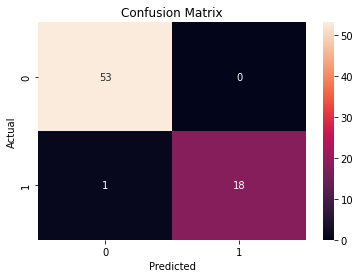

Classification Accuracy: 0.9861111111111112
Classification Error: 0.01388888888888884
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.9736842105263157
Cross-validated AUC: 0.8911057692307691
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95236855 0.04763145]
 [0.95236855 0.04763145]
 [0.2650052  0.7349948 ]
 [0.27042826 0.72957174]
 [0.95109785 0.04890215]
 [0.89848049 0.10151951]
 [0.95109785 0.04890215]
 [0.88793322 0.11206678]
 [0.89592929 0.10407071]
 [0.95236855 0.04763145]]
First 10 predicted probabilities:
 [[0.04763145]
 [0.04763145]
 [0.7349948 ]
 [0.72957174]
 [0.04890215]
 [0.10151951]
 [0.04890215]
 [0.11206678]
 [0.10407071]
 [0.04763145]]


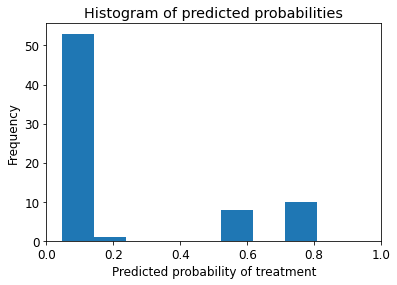

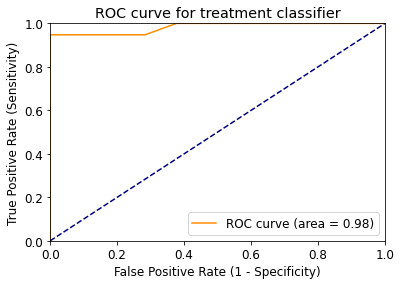

[[53  0]
 [ 1 18]]
treatment ########### Logistic Regression ###############
Accuracy: 0.8472222222222222
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


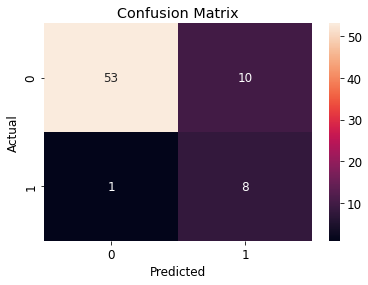

Classification Accuracy: 0.8472222222222222
Classification Error: 0.1527777777777778
False Positive Rate: 0.15873015873015872
Precision: 0.4444444444444444
AUC Score: 0.8650793650793651
Cross-validated AUC: 0.8911057692307691
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95236855 0.04763145]
 [0.95236855 0.04763145]
 [0.2650052  0.7349948 ]
 [0.27042826 0.72957174]
 [0.95109785 0.04890215]
 [0.89848049 0.10151951]
 [0.95109785 0.04890215]
 [0.88793322 0.11206678]
 [0.89592929 0.10407071]
 [0.95236855 0.04763145]]
First 10 predicted probabilities:
 [[0.04763145]
 [0.04763145]
 [0.7349948 ]
 [0.72957174]
 [0.04890215]
 [0.10151951]
 [0.04890215]
 [0.11206678]
 [0.10407071]
 [0.04763145]]


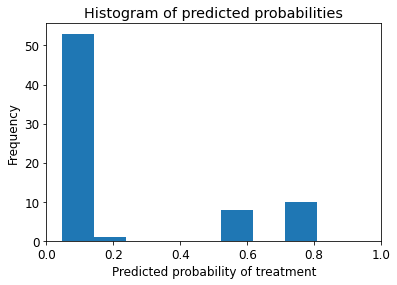

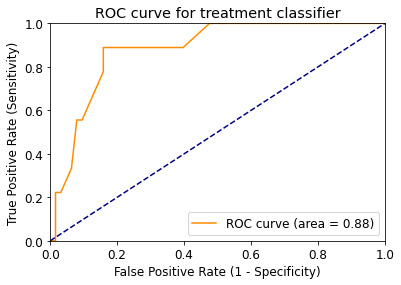

[[53 10]
 [ 1  8]]


In [ ]:
logisticRegression()

In [ ]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # From https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('ytrain ########### KNeighborsClassifier ###############')
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    print('treatment ########### KNeighborsClassifier ###############')
    accuracy_score = evalClassModel(knn, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['KNN'] = accuracy_score * 100

Rand. Best Score:  0.7949795918367347
Rand. Best Params:  {'weights': 'distance', 'n_neighbors': 10}
[0.801, 0.795, 0.807, 0.801, 0.805, 0.799, 0.799, 0.807, 0.801, 0.797, 0.799, 0.801, 0.807, 0.805, 0.801, 0.791, 0.805, 0.807, 0.807, 0.805]
ytrain ########### KNeighborsClassifier ###############
Accuracy: 0.9861111111111112
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


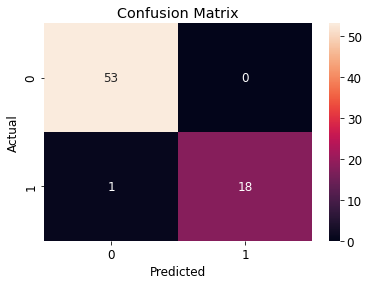

Classification Accuracy: 0.9861111111111112
Classification Error: 0.01388888888888884
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.9736842105263157
Cross-validated AUC: 0.8706246903257773
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.96296296 0.03703704]
 [0.96296296 0.03703704]
 [0.18518519 0.81481481]
 [0.18518519 0.81481481]
 [1.         0.        ]
 [0.92592593 0.07407407]
 [1.         0.        ]
 [0.77777778 0.22222222]
 [0.92592593 0.07407407]
 [0.96296296 0.03703704]]
First 10 predicted probabilities:
 [[0.03703704]
 [0.03703704]
 [0.81481481]
 [0.81481481]
 [0.        ]
 [0.07407407]
 [0.        ]
 [0.22222222]
 [0.07407407]
 [0.03703704]]


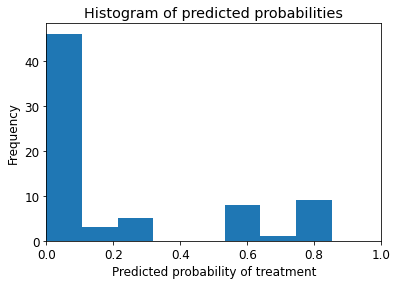

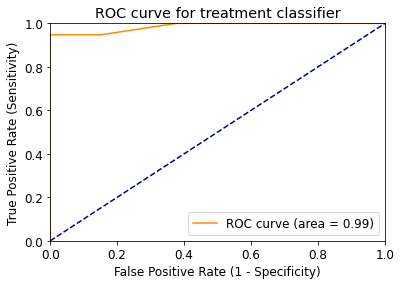

[[53  0]
 [ 1 18]]
treatment ########### KNeighborsClassifier ###############
Accuracy: 0.8472222222222222
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


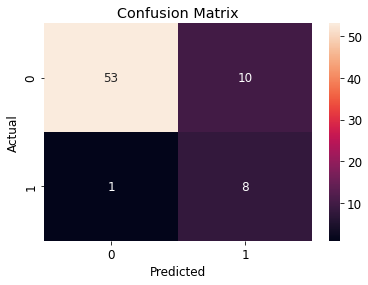

Classification Accuracy: 0.8472222222222222
Classification Error: 0.1527777777777778
False Positive Rate: 0.15873015873015872
Precision: 0.4444444444444444
AUC Score: 0.8650793650793651
Cross-validated AUC: 0.8706246903257773
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.96296296 0.03703704]
 [0.96296296 0.03703704]
 [0.18518519 0.81481481]
 [0.18518519 0.81481481]
 [1.         0.        ]
 [0.92592593 0.07407407]
 [1.         0.        ]
 [0.77777778 0.22222222]
 [0.92592593 0.07407407]
 [0.96296296 0.03703704]]
First 10 predicted probabilities:
 [[0.03703704]
 [0.03703704]
 [0.81481481]
 [0.81481481]
 [0.        ]
 [0.07407407]
 [0.        ]
 [0.22222222]
 [0.07407407]
 [0.03703704]]


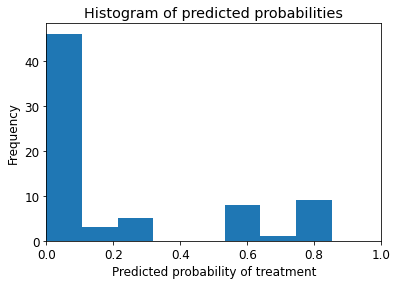

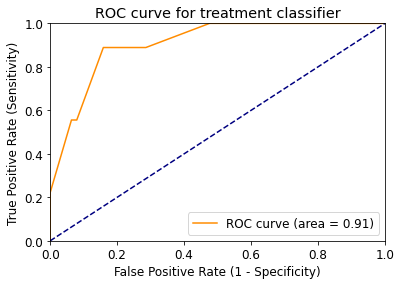

[[53 10]
 [ 1  8]]


In [ ]:
Knn()

In [ ]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=4, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    print('ytrain ########### Tree classifier ###############')
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    print('treat ########### Tree classifier ###############')
    accuracy_score = evalClassModel(tree, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['Tree clas.'] = accuracy_score * 100

Rand. Best Score:  0.8211428571428572
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.821, 0.823, 0.821, 0.829, 0.821, 0.821, 0.821, 0.823, 0.825, 0.819, 0.817, 0.821, 0.815, 0.821, 0.821, 0.821, 0.827, 0.825, 0.821, 0.821]
ytrain ########### Tree classifier ###############
Accuracy: 0.9861111111111112
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


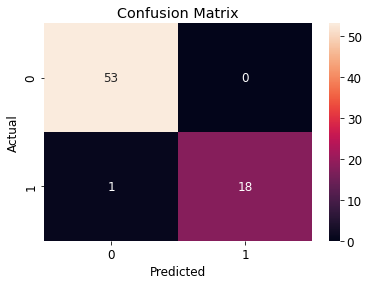

Classification Accuracy: 0.9861111111111112
Classification Error: 0.01388888888888884
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.9736842105263157
Cross-validated AUC: 0.8767543044716959
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.17142857 0.82857143]
 [0.17142857 0.82857143]
 [0.95705521 0.04294479]
 [1.         0.        ]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]]
First 10 predicted probabilities:
 [[0.04294479]
 [0.04294479]
 [0.82857143]
 [0.82857143]
 [0.04294479]
 [0.        ]
 [0.04294479]
 [0.04294479]
 [0.04294479]
 [0.04294479]]


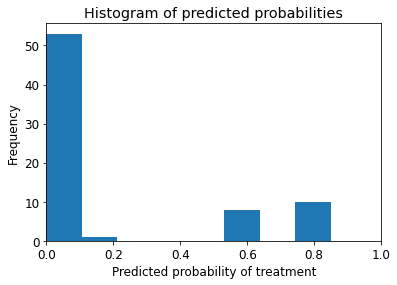

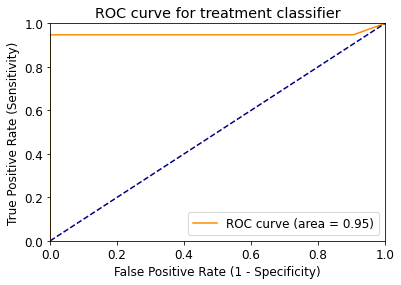

[[53  0]
 [ 1 18]]
treat ########### Tree classifier ###############
Accuracy: 0.8472222222222222
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


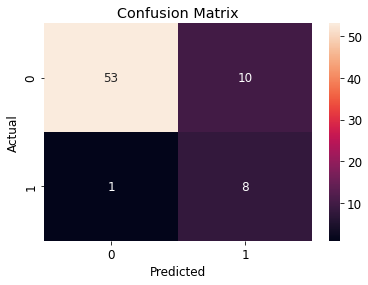

Classification Accuracy: 0.8472222222222222
Classification Error: 0.1527777777777778
False Positive Rate: 0.15873015873015872
Precision: 0.4444444444444444
AUC Score: 0.8650793650793651
Cross-validated AUC: 0.8767543044716959
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.17142857 0.82857143]
 [0.17142857 0.82857143]
 [0.95705521 0.04294479]
 [1.         0.        ]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]
 [0.95705521 0.04294479]]
First 10 predicted probabilities:
 [[0.04294479]
 [0.04294479]
 [0.82857143]
 [0.82857143]
 [0.04294479]
 [0.        ]
 [0.04294479]
 [0.04294479]
 [0.04294479]
 [0.04294479]]


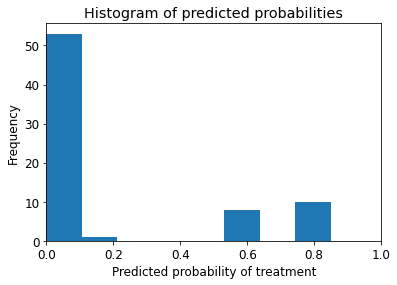

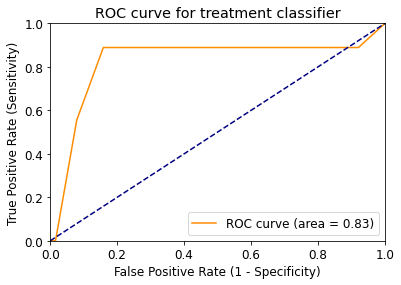

[[53 10]
 [ 1  8]]


In [ ]:
treeClassifier()

In [ ]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    print('ytrain ########### Random Forests ###############')
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    print('treat ########### Random Forests ###############')
    accuracy_score = evalClassModel(my_forest, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100



Rand. Best Score:  0.8211428571428572
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}
[0.821, 0.821, 0.819, 0.823, 0.819, 0.809, 0.821, 0.821, 0.821, 0.821, 0.821, 0.815, 0.821, 0.823, 0.811, 0.821, 0.819, 0.811, 0.821, 0.827]
ytrain ########### Random Forests ###############
Accuracy: 0.9027777777777778
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


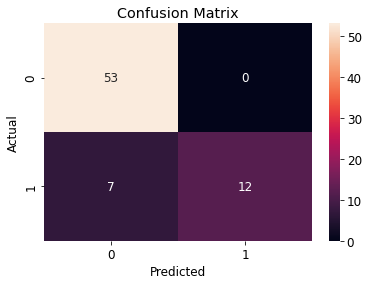

Classification Accuracy: 0.9027777777777778
Classification Error: 0.09722222222222221
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.8157894736842105
Cross-validated AUC: 0.8719229995045212
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95120993 0.04879007]
 [0.95120993 0.04879007]
 [0.27102261 0.72897739]
 [0.29048082 0.70951918]
 [0.99420683 0.00579317]
 [0.84373869 0.15626131]
 [0.99420683 0.00579317]
 [0.80512133 0.19487867]
 [0.84373869 0.15626131]
 [0.95120993 0.04879007]]
First 10 predicted probabilities:
 [[0.04879007]
 [0.04879007]
 [0.72897739]
 [0.70951918]
 [0.00579317]
 [0.15626131]
 [0.00579317]
 [0.19487867]
 [0.15626131]
 [0.04879007]]


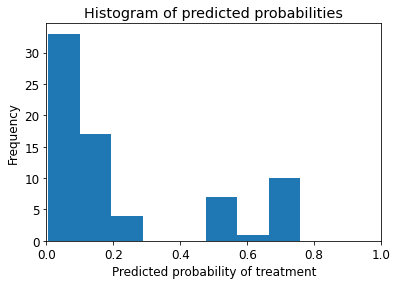

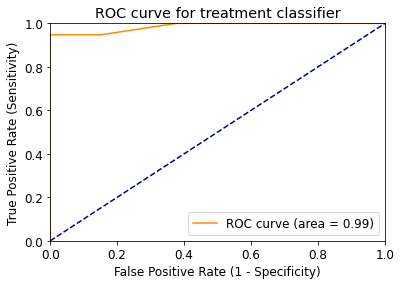

[[53  0]
 [ 7 12]]
treat ########### Random Forests ###############
Accuracy: 0.875
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


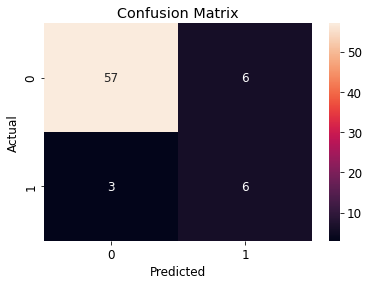

Classification Accuracy: 0.875
Classification Error: 0.125
False Positive Rate: 0.09523809523809523
Precision: 0.5
AUC Score: 0.7857142857142857
Cross-validated AUC: 0.8719229995045212
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.95120993 0.04879007]
 [0.95120993 0.04879007]
 [0.27102261 0.72897739]
 [0.29048082 0.70951918]
 [0.99420683 0.00579317]
 [0.84373869 0.15626131]
 [0.99420683 0.00579317]
 [0.80512133 0.19487867]
 [0.84373869 0.15626131]
 [0.95120993 0.04879007]]
First 10 predicted probabilities:
 [[0.04879007]
 [0.04879007]
 [0.72897739]
 [0.70951918]
 [0.00579317]
 [0.15626131]
 [0.00579317]
 [0.19487867]
 [0.15626131]
 [0.04879007]]


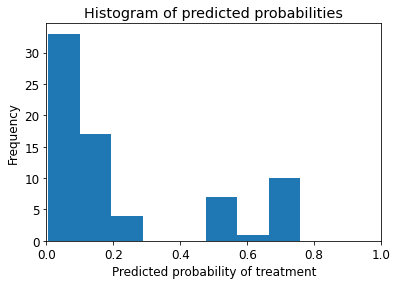

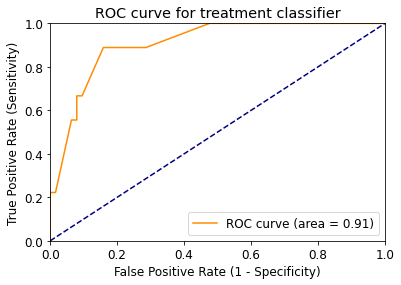

[[57  6]
 [ 3  6]]


In [ ]:
randomForest()

In [ ]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('ytrain ########### Bagging ###############')
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    print('treat ########### Bagging ###############')
    accuracy_score = evalClassModel(bag, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

ytrain ########### Bagging ###############
Accuracy: 0.8888888888888888
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


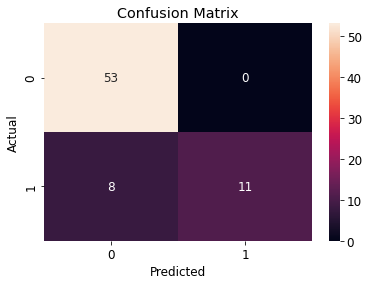

Classification Accuracy: 0.8888888888888888
Classification Error: 0.11111111111111116
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.7894736842105263
Cross-validated AUC: 0.8479627307072958
First 10 predicted responses:
 [0 0 0 0 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[1.         0.        ]
 [1.         0.        ]
 [0.7        0.3       ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98       0.02      ]
 [1.         0.        ]]
First 10 predicted probabilities:
 [[0.        ]
 [0.        ]
 [0.3       ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02      ]
 [0.        ]]


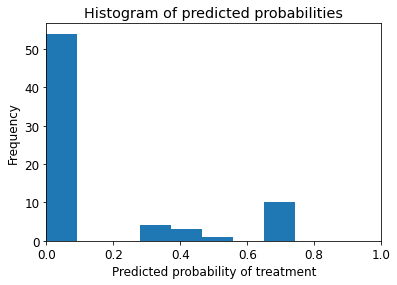

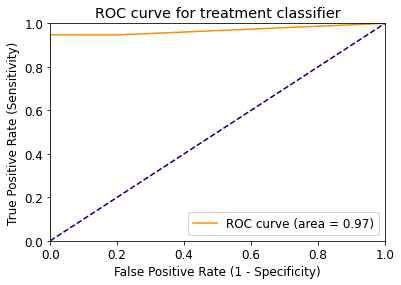

[[53  0]
 [ 8 11]]
treat ########### Bagging ###############
Accuracy: 0.8611111111111112
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


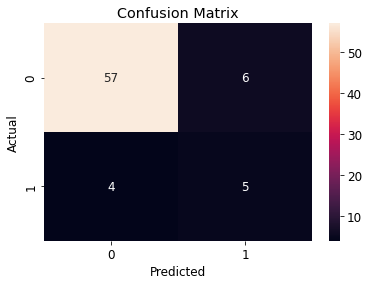

Classification Accuracy: 0.8611111111111112
Classification Error: 0.13888888888888884
False Positive Rate: 0.09523809523809523
Precision: 0.45454545454545453
AUC Score: 0.7301587301587302
Cross-validated AUC: 0.8437349033816426
First 10 predicted responses:
 [0 0 0 0 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[1.         0.        ]
 [1.         0.        ]
 [0.7        0.3       ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.98       0.02      ]
 [1.         0.        ]]
First 10 predicted probabilities:
 [[0.        ]
 [0.        ]
 [0.3       ]
 [0.33333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.02      ]
 [0.        ]]


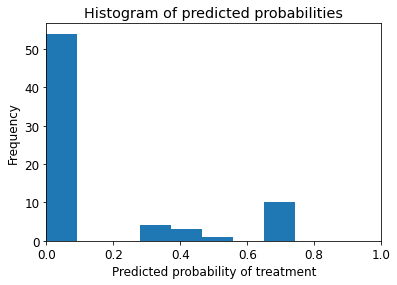

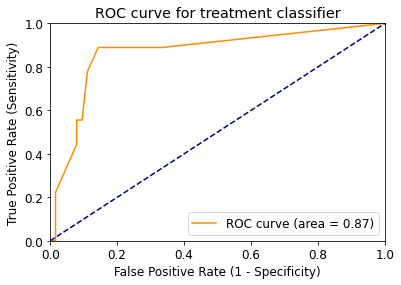

[[57  6]
 [ 4  5]]


In [ ]:
bagging()

In [ ]:
def boosting():
    # Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('ytrain ########### Boosting ###############')
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    print('treatment ########### Boosting ###############')
    accuracy_score = evalClassModel(boost, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

ytrain ########### Boosting ###############
Accuracy: 0.9722222222222222
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


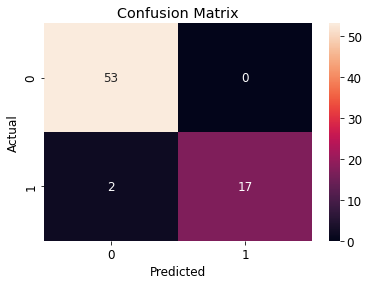

Classification Accuracy: 0.9722222222222222
Classification Error: 0.02777777777777779
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.9473684210526316
Cross-validated AUC: 0.8793660194475411
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.50179701 0.49820299]
 [0.50179701 0.49820299]
 [0.49906454 0.50093546]
 [0.49983764 0.50016236]
 [0.50148685 0.49851315]
 [0.50159915 0.49840085]
 [0.50148685 0.49851315]
 [0.50127692 0.49872308]
 [0.50082606 0.49917394]
 [0.50179701 0.49820299]]
First 10 predicted probabilities:
 [[0.49820299]
 [0.49820299]
 [0.50093546]
 [0.50016236]
 [0.49851315]
 [0.49840085]
 [0.49851315]
 [0.49872308]
 [0.49917394]
 [0.49820299]]


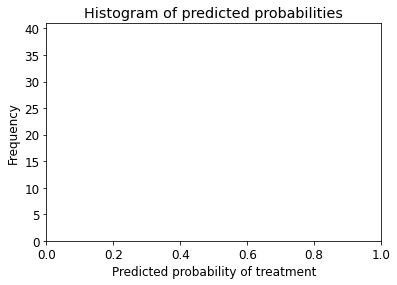

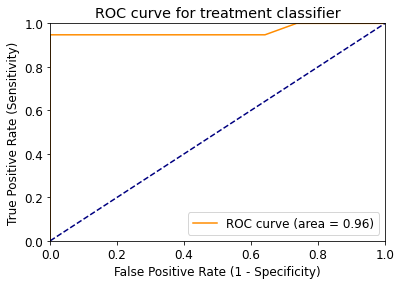

[[53  0]
 [ 2 17]]
treatment ########### Boosting ###############
Accuracy: 0.8333333333333334
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


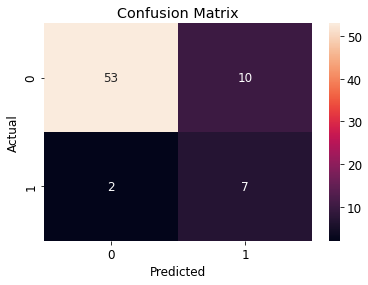

Classification Accuracy: 0.8333333333333334
Classification Error: 0.16666666666666663
False Positive Rate: 0.15873015873015872
Precision: 0.4117647058823529
AUC Score: 0.8095238095238095
Cross-validated AUC: 0.8793660194475411
First 10 predicted responses:
 [0 0 1 1 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.50179701 0.49820299]
 [0.50179701 0.49820299]
 [0.49906454 0.50093546]
 [0.49983764 0.50016236]
 [0.50148685 0.49851315]
 [0.50159915 0.49840085]
 [0.50148685 0.49851315]
 [0.50127692 0.49872308]
 [0.50082606 0.49917394]
 [0.50179701 0.49820299]]
First 10 predicted probabilities:
 [[0.49820299]
 [0.49820299]
 [0.50093546]
 [0.50016236]
 [0.49851315]
 [0.49840085]
 [0.49851315]
 [0.49872308]
 [0.49917394]
 [0.49820299]]


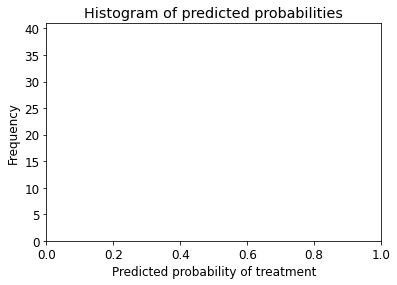

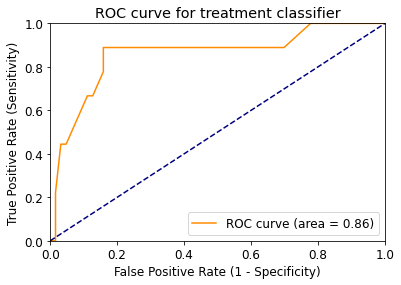

[[53 10]
 [ 2  7]]


In [ ]:
boosting()

In [ ]:
def stacking():
    # Building and fitting 
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)
    
    print('ytrain ########### Stacking ###############')
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    print('treat ########### Stacking ###############')
    accuracy_score = evalClassModel(stack, test_treat, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100
    


ytrain ########### Stacking ###############
Accuracy: 0.9305555555555556
Null accuracy:
 0    53
1    19
Name: y_train, dtype: int64
Percentage of ones: 0.2638888888888889
Percentage of zeros: 0.7361111111111112
True: [0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


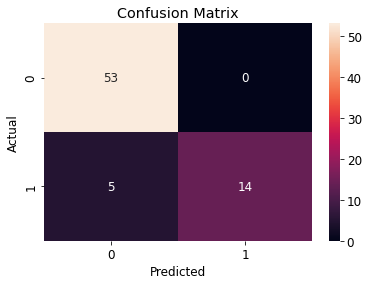

Classification Accuracy: 0.9305555555555556
Classification Error: 0.06944444444444442
False Positive Rate: 0.0
Precision: 1.0
AUC Score: 0.868421052631579
Cross-validated AUC: 0.8459018487551097
First 10 predicted responses:
 [0 0 0 0 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.82795354 0.17204646]
 [0.82795354 0.17204646]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]]
First 10 predicted probabilities:
 [[0.05758817]
 [0.05758817]
 [0.17204646]
 [0.17204646]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]]


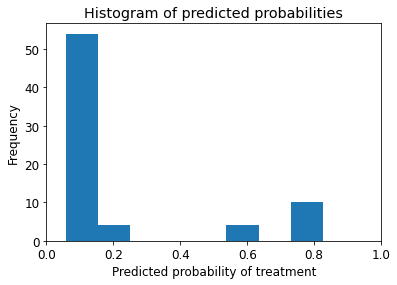

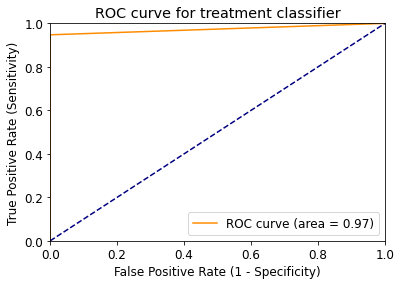

[[53  0]
 [ 5 14]]
treat ########### Stacking ###############
Accuracy: 0.875
Null accuracy:
 0    63
1     9
Name: seek_treatment, dtype: int64
Percentage of ones: 0.125
Percentage of zeros: 0.875
True: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


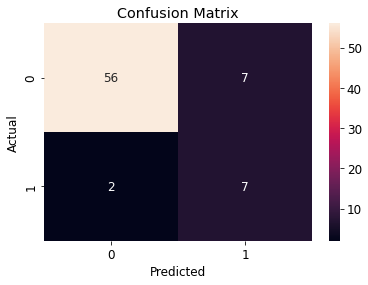

Classification Accuracy: 0.875
Classification Error: 0.125
False Positive Rate: 0.1111111111111111
Precision: 0.5
AUC Score: 0.8333333333333333
Cross-validated AUC: 0.8459018487551097
First 10 predicted responses:
 [0 0 0 0 0 0 0 0 0 0]
First 10 predicted probabilities of class members:
 [[0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.82795354 0.17204646]
 [0.82795354 0.17204646]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]
 [0.94241183 0.05758817]]
First 10 predicted probabilities:
 [[0.05758817]
 [0.05758817]
 [0.17204646]
 [0.17204646]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]
 [0.05758817]]


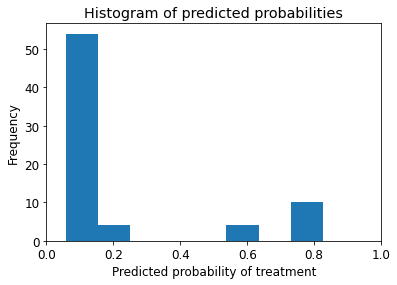

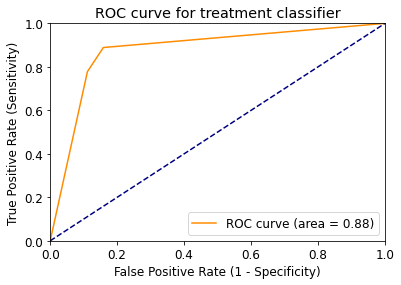

[[56  7]
 [ 2  7]]


In [ ]:
stacking()

In [ ]:
import tensorflow as tf
import argparse


batch_size = 100
train_steps = 1000

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

train = df2 
test = df7
X_train = train[["age", "gender","family_history","interference_work_at_all"]]
X = X_train
y_train = train.iloc[:, 5]
y = y_train
X_test = test[["age", "gender","family_history","interference_work_at_all"]]
y_test = test.iloc[:,17]
test_treat = test.iloc[:,13]

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset




In [ ]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("age")
gender = tf.feature_column.numeric_column("gender")
family_history = tf.feature_column.numeric_column("family_history")
#anonymity = tf.feature_column.numeric_column("anonymity")
treatment = tf.feature_column.numeric_column("treatment")
interference_work_at_all = tf.feature_column.numeric_column("interference_work_at_all")
feature_columns = [age, gender, family_history, interference_work_at_all] # anonymity

In [ ]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer =tf.optimizers.SGD(
                                      learning_rate=0.003,
                                      name='SGD'
                                    ))#l1_regularization_strength=0.001

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsf9odsio', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpsf9odsio/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6813425, step = 0
INFO:tensorflow:global_step/sec: 401.962
INFO:tensorflow:loss = 0.6377432, step = 100 (0.254 sec)
INFO:tensorflow:global_step/sec: 565.083
INFO:tensorflow:loss = 0.60312784, step = 200 (0.177 sec)
INFO:tensorflow:global_step/sec: 584.679
INFO:tensorflow:loss = 0.6114271, step = 300 (0.172 sec)
INFO:tensorflow:global_step/sec: 526.741
INFO:tensorflow:loss = 0.5746529, step = 400 (0.188 sec)
INFO:tensorflow:global_step/sec: 603.259
INFO:tensorflow:loss = 0.5728962, step = 500 (0.166 sec)
INFO:

In [ ]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-03-31T10:26:24
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsf9odsio/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.56277s
INFO:tensorflow:Finished evaluation at 2022-03-31-10:26:25
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9861111, accuracy_baseline = 0.7361111, auc = 0.99751735, auc_precision_recall = 0.9939933, average_loss = 0.34592018, global_step = 1000, label/mean = 0.2638889, loss = 0.34592018, precision = 1.0, prediction/mean = 0.32841337, recall = 0.94736844
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpsf9odsio/model.ckpt-1000

Test set accuracy: 0.99



In [ ]:
eval_result2 = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, test_treat, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result2))

#Data for final graph
accuracy01 = eval_result2['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy01


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-03-31T10:26:32
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsf9odsio/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.70461s
INFO:tensorflow:Finished evaluation at 2022-03-31-10:26:33
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8472222, accuracy_baseline = 0.875, auc = 0.8747795, auc_precision_recall = 0.33134067, average_loss = 0.40523466, global_step = 1000, label/mean = 0.125, loss = 0.40523466, precision = 0.44444445, prediction/mean = 0.32841337, recall = 0.8888889
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpsf9odsio/model.ckpt-1000

Test set accuracy: 0.85

